In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting in notebooks
%matplotlib inline


In [ ]:
df = pd.read_csv("googleplaystore.csv")
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df.drop_duplicates(inplace=True)


In [10]:
df.isnull().sum()
df = df.dropna()  # Drop rows with missing values


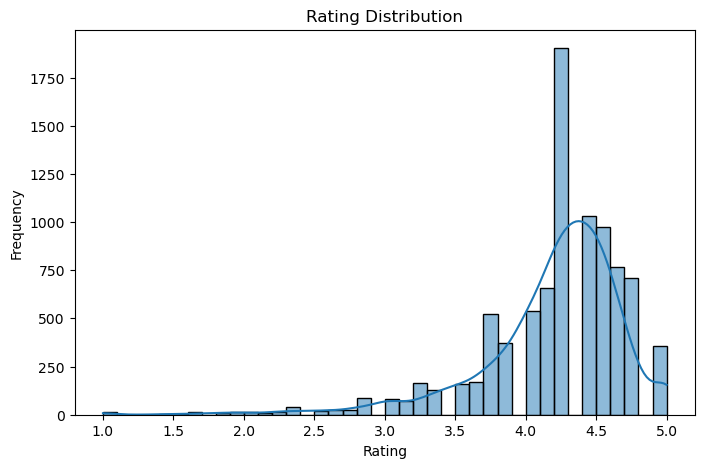

In [15]:
# Basic statistics
df['Rating'].describe()

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=40, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


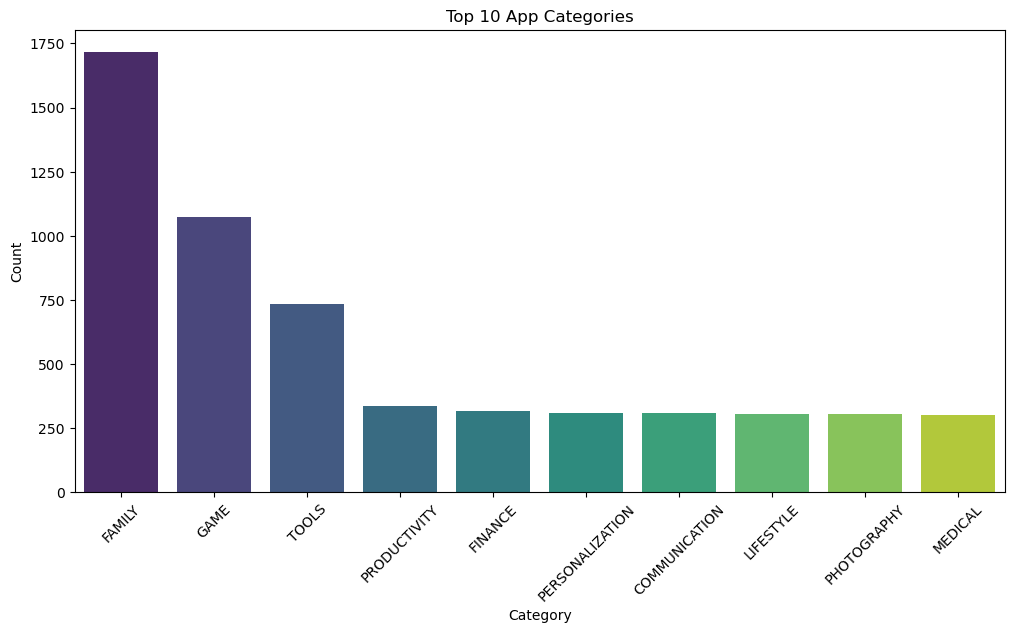

In [23]:
plt.figure(figsize=(12,6))
top_categories = df['Category'].value_counts().head(10).reset_index()
top_categories.columns = ['Category', 'Count']

sns.barplot(data=top_categories, x='Category', y='Count', hue='Category', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('Top 10 App Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


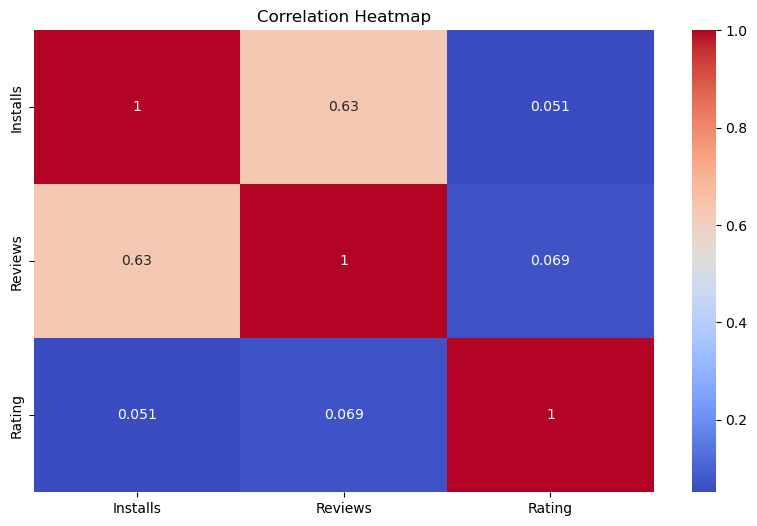

In [25]:
# Plot correlations
plt.figure(figsize=(10,6))
sns.heatmap(df[['Installs', 'Reviews', 'Rating']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


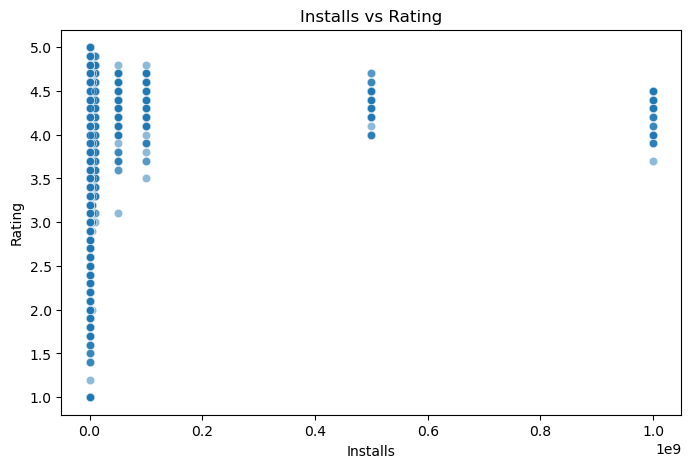

In [24]:
# Scatter plot between Installs and Ratings
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Installs', y='Rating', alpha=0.5)
plt.title('Installs vs Rating')
plt.show()


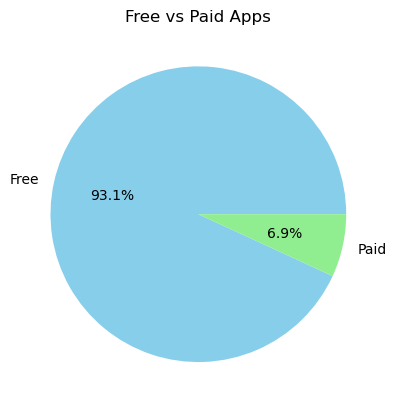

In [27]:
# Pie chart of Free vs Paid
free_paid = df['Type'].value_counts()
plt.pie(free_paid, labels=free_paid.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Free vs Paid Apps')
plt.show()



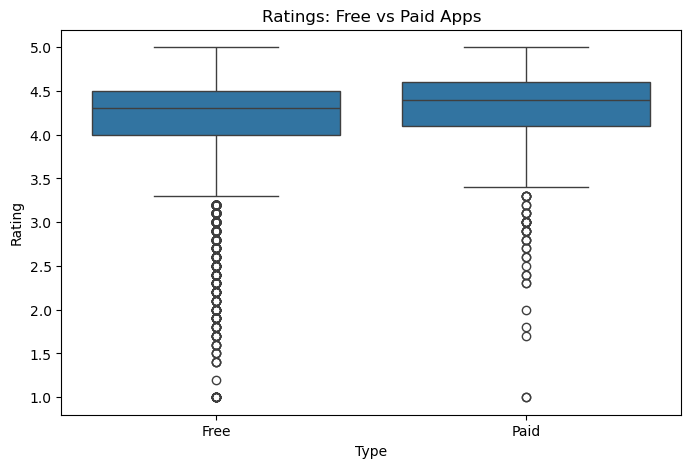

In [26]:
# Boxplot of ratings for Free vs Paid
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Rating', data=df)
plt.title('Ratings: Free vs Paid Apps')
plt.show()


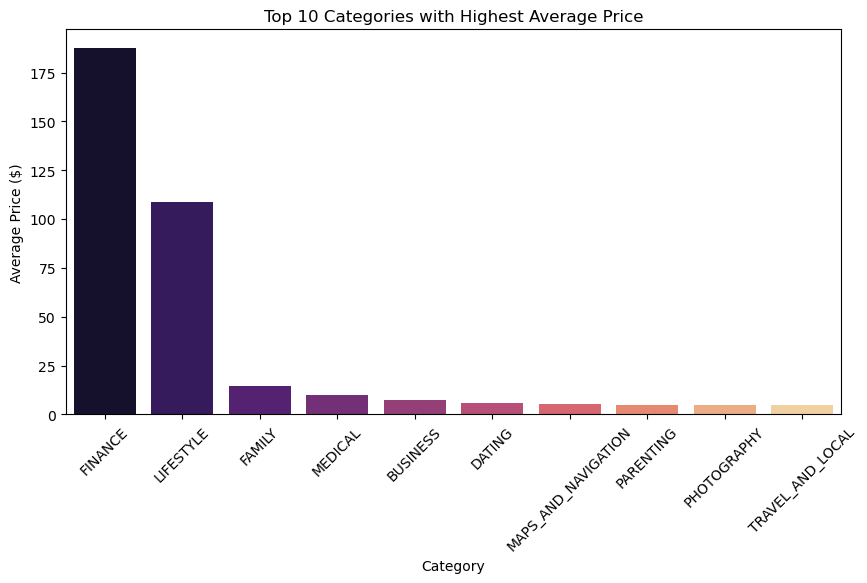

In [28]:
# Convert to DataFrame
top_paid_df = top_paid_categories.reset_index()
top_paid_df.columns = ['Category', 'AvgPrice']

plt.figure(figsize=(10,5))
sns.barplot(data=top_paid_df, x='Category', y='AvgPrice', hue='Category', palette='magma', legend=False)
plt.title('Top 10 Categories with Highest Average Price')
plt.xticks(rotation=45)
plt.ylabel('Average Price ($)')
plt.show()
